MACHINE LEARNING FOR PREDICTING WIN % OF THE 2024 SEASON OF THE ATP TOP 50 TENNIS PLAYERs

## IMPORTS

In [3]:
import chromedriver_autoinstaller
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd
import numpy as np

## DATA RECOLLECTION

We are going to collect the data from: https://www.tennisabstract.com/cgi-bin/leaders.cgi
Using Selenium to do the WebScrapping


In [1]:
import chromedriver_autoinstaller
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd

chromedriver_autoinstaller.install(True)

options = webdriver.ChromeOptions()
options.headless = False

driver = webdriver.Chrome(options=options)

url = "https://www.tennisabstract.com/cgi-bin/leaders.cgi"
driver.get(url)

time.sleep(3)

def extract_table_data():
    table = driver.find_element(By.ID, 'matches')
    rows = table.find_elements(By.TAG_NAME, 'tr')
    data = []

    for row in rows[1:]:
        columns = row.find_elements(By.TAG_NAME, 'td')
        if columns:
            row_data = [col.text.strip() for col in columns]
            data.append(row_data)

    return data

columns = {
    "Serve": ['Rk', 'Player', 'M', 'M W-L', 'M W%', 'SPW', 'SPW-InP', 'Aces', 'Ace%', 'DFs', 'DF%', 'DF/2s', '1stIn', '1st%', '2nd%', '2%-InP', 'Hld%', 'Pts/SG', 'PtsL/SG'],
    "Return": ['Rk', 'Player', 'M', 'RPW', 'RPW-InP', 'vAce%', 'vDF%', 'v1st%', 'v2nd%', 'Brk%', 'Pts/RG', 'PtsW/RG', 'MdOppRk', 'MnOppRk'],
    "Breaks": ['Rk', 'Player', 'M', 'BPConv%', 'BPConv', 'BPChnc', 'BP/G', 'BP/S', 'BP/M', 'Bks/S', 'Bks/M', 'BPSvd%', 'BPSaved', 'BPvs', 'BPvs/G', 'BPvs/S', 'BPvs/M', 'Bkn/S', 'Bkn/M'],
    "More": ['Rk', 'Player', 'M', 'DR', 'Points', 'TPW%', 'TBs', 'TB W-L', 'TB W%', 'TB/S', 'Sets', 'Set W-L', 'S W%', 'Gms', 'Game W-L', 'G W%', 'Time/Mt', 'Min/Set', 'Sec/Pt']
}

def get_dataframes():
    dataframes = {}
    stat_categories = ["Serve", "Return", "Breaks", "More"]

    for category in stat_categories:
        stat_button = driver.find_element(By.XPATH, f"//span[text()='{category}']")
        stat_button.click()
        time.sleep(2)
        data = extract_table_data()
        df = pd.DataFrame(data, columns=columns[category])
        dataframes[category] = df

    return dataframes

# Step 1: Scrape data for the top 50 players
dataframes_top_50 = get_dataframes()

# Click on the link to get 51-100 players
driver.find_element(By.XPATH, "//a[text()='51-100']").click()
time.sleep(3)

# Step 2: Scrape data for the 51-100 players
dataframes_51_100 = get_dataframes()

# Click on the link to get Challenger players
driver.find_element(By.XPATH, "//a[text()='Challengers']").click()
time.sleep(3)

# Step 3: Scrape data for the Challenger players
dataframes_challengers = get_dataframes()

# Close the browser after scraping
driver.quit()

# Optional: Split the top 50 data for THE PREDICT
df_serve_top50 = dataframes_top_50["Serve"]
df_return_top50 = dataframes_top_50["Return"]
df_breaks_top50 = dataframes_top_50["Breaks"]
df_more_top50 = dataframes_top_50["More"]

# Step 4: Concatenate data from 51-100, and Challengers
df_serve = pd.concat([dataframes_challengers["Serve"], dataframes_51_100["Serve"]], ignore_index=True)
df_return = pd.concat([dataframes_challengers["Return"], dataframes_51_100["Return"]], ignore_index=True)
df_breaks = pd.concat([dataframes_challengers["Breaks"], dataframes_51_100["Breaks"]], ignore_index=True)
df_more = pd.concat([dataframes_challengers["More"], dataframes_51_100["More"]], ignore_index=True)

# Check the combined DataFrames
print("Serve Stats (50-100 + Challengers):\n", df_serve.head())
print("\nReturn Stats (50-100 + Challengers):\n", df_return.head())
print("\nBreaks Stats (50-100 + Challengers):\n", df_breaks.head())
print("\nMore Stats (50-100 + Challengers):\n", df_more.head())



Serve Stats (50-100 + Challengers):
     Rk                      Player   M  M W-L   M W%    SPW SPW-InP Aces  \
0   38     Brandon Nakashima [USA]  45  34-11  75.6%  67.8%   65.4%  353   
1   76        Bu Yunchaokete [CHN]  46  33-13  71.7%  63.0%   61.6%  259   
2  103           Adam Walton [AUS]  55  37-18  67.3%  66.7%   65.8%  294   
3  104         Damir Dzumhur [BIH]  47  36-11  76.6%  61.8%   63.1%   42   
4  105  Camilo Ugo Carabelli [ARG]  63  46-17  73.0%  59.7%   60.1%  161   

    Ace%  DFs   DF% DF/2s  1stIn   1st%   2nd% 2%-InP   Hld% Pts/SG PtsL/SG  
0  10.9%   70  2.2%  6.2%  65.0%  74.9%  54.6%  58.2%  87.4%    6.4     2.1  
1   7.6%   83  2.4%  5.6%  56.9%  70.5%  53.1%  56.3%  80.3%    6.6     2.4  
2   7.8%  100  2.6%  6.9%  61.8%  74.1%  54.6%  58.7%  83.4%    6.2     2.1  
3   1.3%   88  2.8%  9.0%  68.8%  65.7%  53.3%  58.5%  74.9%    6.3     2.4  
4   3.5%  138  3.0%  8.2%  63.2%  66.3%  48.3%  52.6%  72.5%    6.6     2.7  

Return Stats (50-100 + Challengers):


In [281]:
duplicates = df_serve_all[df_serve_all.duplicated()]
print(duplicates)
df_serve_all.to_csv("prueba.csv", index=False)

      Rk                         Player   M  M W-L   M W%    SPW SPW-InP Aces  \
51     1            Jannik Sinner [ITA]  80   73-7  91.3%  70.8%   69.6%  610   
52     2           Carlos Alcaraz [ESP]  66  53-13  80.3%  68.0%   67.9%  290   
53     3         Alexander Zverev [GER]  83  62-21  74.7%  69.7%   67.9%  764   
54     4           Novak Djokovic [SRB]  58  47-11  81.0%  69.1%   68.2%  412   
55     5          Daniil Medvedev [RUS]  66  47-19  71.2%  64.0%   64.6%  439   
..   ...                            ...  ..    ...    ...    ...     ...  ...   
415  286     Juan Bautista Torres [ARG]  48  25-23  52.1%  57.7%   59.2%   50   
416  289           Giovanni Fonio [ITA]  47  20-27  42.6%  62.6%   63.1%  184   
417  305     Francesco Maestrelli [ITA]  44  19-25  43.2%  59.3%   59.6%  208   
418  348  Genaro Alberto Olivieri [ARG]  45  21-24  46.7%  58.1%   58.9%   67   
419                             Average             57.5%  61.6%   61.7%        

      Ace%  DFs   DF%  DF/2

I DECIDED TO COLLECT THE DATA OF THE TOP 51-100 AND CHALLENGERS PLAYERS TO TRAIN AND TEST MY MODEL SO THEN I CAN PREDICT THE WIN% OF THE TOP 50 PLAYERS, THATS WHY I CONCATENATED THE 51-100 AND CHALLENGERS DFs

## DATA LEGEND

- **Rk**: Rank of the player.
- **Player**: Name of the player.
- **M_serve**: Total matches where the player served.
- **M_W%**: Percentage of matches won by the player.
- **SPW**: Serve points won percentage.
- **SPW-InP**: Serve points won percentage in play, excluding aces and double faults.
- **Ace%**: Ace rate (percentage of aces served).
- **DF%**: Double fault rate (percentage of double faults).
- **DF/2s**: Double faults per second serve.
- **1stIn**: First serve percentage (percentage of first serves landed in).
- **1st%**: First serve points won percentage.
- **2nd%**: Second serve points won percentage.
- **2%-InP**: Percentage of second serve points won, excluding double faults.
- **Hld%**: Hold rate (percentage of service games won).
- **Pts/SG**: Points played per service game.
- **PtsL/SG**: Points lost per service game.
- **M_return**: Total matches where the player returned serve.
- **RPW**: Return points won percentage.
- **RPW-InP**: Return points won percentage in play, excluding aces and double faults.
- **vAce%**: Ace rate against (percentage of aces served by opponents).
- **vDF%**: Double fault rate against (percentage of double faults by opponents).
- **v1st%**: First serve return points won percentage.
- **v2nd%**: Second serve return points won percentage.
- **Brk%**: Break points won percentage (percentage of return games won).
- **Pts/RG**: Points played per return game.
- **PtsW/RG**: Points won per return game.
- **MdOppRk**: Median opponent ATP rank.
- **MnOppRk**: Mean opponent ATP rank.
- **M**: Total matches played by the player.
- **BPConv%**: Percentage of break point opportunities converted.
- **BPConv**: Break point opportunities converted count.
- **BPChnc**: Break point chances (total break point opportunities).
- **BP/G**: Break points earned per return game.
- **BP/S**: Break points earned per set.
- **BP/M**: Break points earned per match.
- **Bks/S**: Return games won per set.
- **Bks/M**: Return games won per match.
- **BPSvd%**: Percentage of break points saved on serve.
- **BPSaved**: Break point opportunities saved count.
- **BPvs**: Break points faced on serve.
- **BPvs/G**: Break points faced per service game.
- **BPvs/S**: Break points faced per set.
- **BPvs/M**: Break points faced per match.
- **Bkn/S**: Service games lost per set.
- **Bkn/M**: Service games lost per match.
- **M_more**: Number of additional matches played.
- **TBs**: Total tiebreakers played.
- **TB_W%**: Tiebreakers won percentage.
- **TB/S**: Tiebreakers played per set.
- **Sets**: Total sets played.
- **Gms**: Total games played.
- **Sec/Pt**: Average seconds per point played.
- **Sec_Set**: Average seconds per set played.
- **Time_Mt_sec**: Total time spent in a match (in seconds).


## DATA PREPARATION

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# Verify the shape of each DataFrame
print("df_serve shape:", df_serve.shape)
print("df_return shape:", df_return.shape)
print("df_breaks shape:", df_breaks.shape)
print("df_more shape:", df_more.shape)

df_serve shape: (106, 19)
df_return shape: (106, 14)
df_breaks shape: (106, 19)
df_more shape: (106, 19)


In [4]:
# Verify the dtypes of each DataFrame
print("df_serve dtypes:", df_serve.dtypes)
print("df_return dtypes:", df_return.dtypes)
print("df_breaks dtypes:", df_breaks.dtypes)
print("df_more dtypes:", df_more.dtypes)

df_serve dtypes: Rk         object
Player     object
M          object
M W-L      object
M W%       object
SPW        object
SPW-InP    object
Aces       object
Ace%       object
DFs        object
DF%        object
DF/2s      object
1stIn      object
1st%       object
2nd%       object
2%-InP     object
Hld%       object
Pts/SG     object
PtsL/SG    object
dtype: object
df_return dtypes: Rk         object
Player     object
M          object
RPW        object
RPW-InP    object
vAce%      object
vDF%       object
v1st%      object
v2nd%      object
Brk%       object
Pts/RG     object
PtsW/RG    object
MdOppRk    object
MnOppRk    object
dtype: object
df_breaks dtypes: Rk         object
Player     object
M          object
BPConv%    object
BPConv     object
BPChnc     object
BP/G       object
BP/S       object
BP/M       object
Bks/S      object
Bks/M      object
BPSvd%     object
BPSaved    object
BPvs       object
BPvs/G     object
BPvs/S     object
BPvs/M     object
Bkn/S      object
B

Here we see that all the values we captured are in an object dtype.
Because of that im going to transform them into numerical values, remove the spaces from the variable names and remove any NaN values.

In [5]:
# Remove the last row from all DataFrames using .iloc
df_serve1 = df_serve.iloc[:-1].copy()  # Remove only the last row and create a copy
df_return1 = df_return.iloc[:-1].copy()  # Remove only the last row and create a copy
df_breaks1 = df_breaks.iloc[:-1].copy()  # Remove only the last row and create a copy
df_more1 = df_more.iloc[:-1].copy()  # Remove only the last row and create a copy

# Verify the shape of the new DataFrames after removing the last row
print("df_serve1 shape after removing last row:", df_serve1.shape)
print("df_return1 shape after removing last row:", df_return1.shape)
print("df_breaks1 shape after removing last row:", df_breaks1.shape)
print("df_more1 shape after removing last row:", df_more1.shape)

df_serve1 shape after removing last row: (105, 19)
df_return1 shape after removing last row: (105, 14)
df_breaks1 shape after removing last row: (105, 19)
df_more1 shape after removing last row: (105, 19)


In [6]:
# Check for duplicates in df_serve
print("Duplicates in df_serve:", df_serve1.duplicated().sum())
print("Duplicates in df_return:", df_return1.duplicated().sum())
print("Duplicates in df_breaks:", df_breaks1.duplicated().sum())
print("Duplicates in df_more:", df_more1.duplicated().sum())

Duplicates in df_serve: 0
Duplicates in df_return: 0
Duplicates in df_breaks: 0
Duplicates in df_more: 0


In [7]:
 df_serve1.tail()

,Rk,Player,M,M W-L,M W%,SPW,SPW-InP,Aces,Ace%,DFs,DF%,DF/2s,1stIn,1st%,2nd%,2%-InP,Hld%,Pts/SG,PtsL/SG
100,96,Lucas Pouille [FRA],6,3-3,50.0%,61.0%,60.7%,33,6.3%,19,3.6%,8.3%,56.4%,71.5%,47.4%,51.7%,73.2%,6.4,2.5
101,97,Francisco Comesana [ARG],11,4-7,36.4%,62.5%,61.7%,82,7.3%,37,3.3%,8.7%,62.0%,70.5%,49.5%,54.2%,76.0%,6.5,2.5
102,98,Thiago Monteiro [BRA],25,13-12,52.0%,67.5%,66.9%,138,7.4%,52,2.8%,8.1%,65.8%,73.2%,56.5%,61.5%,85.0%,6.2,2.0
103,99,Aleksandar Kovacevic [USA],30,9-21,30.0%,64.5%,62.9%,301,11.5%,111,4.2%,10.2%,58.6%,75.8%,48.6%,54.1%,82.0%,6.5,2.3
104,100,Luca Nardi [ITA],19,5-14,26.3%,58.5%,60.0%,54,3.6%,73,4.9%,13.6%,63.8%,67.4%,42.9%,49.7%,69.7%,6.5,2.7


In [8]:
# Check for non-numeric values in the 'Rk' column
non_numeric_rk = df_serve1[df_serve1['Rk'].apply(lambda x: not str(x).isdigit())]
print("Non-numeric values in 'Rk':")
print(non_numeric_rk)

Non-numeric values in 'Rk':
   Rk   Player M M W-L   M W%    SPW SPW-InP Aces  Ace% DFs   DF% DF/2s  \
54     Average          57.6%  61.7%   61.7%       5.6%      3.6%  9.2%   

    1stIn   1st%   2nd% 2%-InP   Hld% Pts/SG PtsL/SG  
54  61.4%  68.8%  50.4%  55.5%  75.6%    6.5     2.5  


In [9]:
def clean_rk_column(df):
    df = df[df['Rk'] != 'Average']
    
    df['Rk'] = pd.to_numeric(df['Rk'], errors='coerce')
    
    df = df.dropna(subset=['Rk'])
    
    df['Rk'] = df['Rk'].astype(int)
    
    return df

df_serve1 = clean_rk_column(df_serve1)
df_return1 = clean_rk_column(df_return1)
df_breaks1 = clean_rk_column(df_breaks1)
df_more1 = clean_rk_column(df_more1)

print(df_serve1.head())
print(df_return1.head())
print(df_breaks1.head())
print(df_more1.head())


    Rk                      Player   M  M W-L   M W%    SPW SPW-InP Aces  \
0   38     Brandon Nakashima [USA]  45  34-11  75.6%  67.8%   65.4%  353   
1   76        Bu Yunchaokete [CHN]  46  33-13  71.7%  63.0%   61.6%  259   
2  103           Adam Walton [AUS]  55  37-18  67.3%  66.7%   65.8%  294   
3  104         Damir Dzumhur [BIH]  47  36-11  76.6%  61.8%   63.1%   42   
4  105  Camilo Ugo Carabelli [ARG]  63  46-17  73.0%  59.7%   60.1%  161   

    Ace%  DFs   DF% DF/2s  1stIn   1st%   2nd% 2%-InP   Hld% Pts/SG PtsL/SG  
0  10.9%   70  2.2%  6.2%  65.0%  74.9%  54.6%  58.2%  87.4%    6.4     2.1  
1   7.6%   83  2.4%  5.6%  56.9%  70.5%  53.1%  56.3%  80.3%    6.6     2.4  
2   7.8%  100  2.6%  6.9%  61.8%  74.1%  54.6%  58.7%  83.4%    6.2     2.1  
3   1.3%   88  2.8%  9.0%  68.8%  65.7%  53.3%  58.5%  74.9%    6.3     2.4  
4   3.5%  138  3.0%  8.2%  63.2%  66.3%  48.3%  52.6%  72.5%    6.6     2.7  
    Rk                      Player   M    RPW RPW-InP vAce%  vDF%  v1st%  \

In [10]:
# Verify the cleaned DataFrames
print(df_serve1.head())
print(df_return1.head())
print(df_breaks1.head())
print(df_more1.head())

    Rk                      Player   M  M W-L   M W%    SPW SPW-InP Aces  \
0   38     Brandon Nakashima [USA]  45  34-11  75.6%  67.8%   65.4%  353   
1   76        Bu Yunchaokete [CHN]  46  33-13  71.7%  63.0%   61.6%  259   
2  103           Adam Walton [AUS]  55  37-18  67.3%  66.7%   65.8%  294   
3  104         Damir Dzumhur [BIH]  47  36-11  76.6%  61.8%   63.1%   42   
4  105  Camilo Ugo Carabelli [ARG]  63  46-17  73.0%  59.7%   60.1%  161   

    Ace%  DFs   DF% DF/2s  1stIn   1st%   2nd% 2%-InP   Hld% Pts/SG PtsL/SG  
0  10.9%   70  2.2%  6.2%  65.0%  74.9%  54.6%  58.2%  87.4%    6.4     2.1  
1   7.6%   83  2.4%  5.6%  56.9%  70.5%  53.1%  56.3%  80.3%    6.6     2.4  
2   7.8%  100  2.6%  6.9%  61.8%  74.1%  54.6%  58.7%  83.4%    6.2     2.1  
3   1.3%   88  2.8%  9.0%  68.8%  65.7%  53.3%  58.5%  74.9%    6.3     2.4  
4   3.5%  138  3.0%  8.2%  63.2%  66.3%  48.3%  52.6%  72.5%    6.6     2.7  
    Rk                      Player   M    RPW RPW-InP vAce%  vDF%  v1st%  \

In [11]:
# Check for missing values in 'Player' and 'Rk' columns in each DataFrame before merging
print(df_serve1[['Player', 'Rk']].isna().sum())
print(df_return1[['Player', 'Rk']].isna().sum())
print(df_breaks1[['Player', 'Rk']].isna().sum())
print(df_more1[['Player', 'Rk']].isna().sum())

# Check if 'Player' and 'Rk' values match between DataFrames
print("Unique Players in df_serve1:", df_serve1['Player'].nunique())
print("Unique Players in df_return1:", df_return1['Player'].nunique())
print("Unique Players in df_breaks1:", df_breaks1['Player'].nunique())
print("Unique Players in df_more1:", df_more1['Player'].nunique())

print("Unique Rk in df_serve1:", df_serve1['Rk'].nunique())
print("Unique Rk in df_return1:", df_return1['Rk'].nunique())
print("Unique Rk in df_breaks1:", df_breaks1['Rk'].nunique())
print("Unique Rk in df_more1:", df_more1['Rk'].nunique())


Player    0
Rk        0
dtype: int64
Player    0
Rk        0
dtype: int64
Player    0
Rk        0
dtype: int64
Player    0
Rk        0
dtype: int64
Unique Players in df_serve1: 103
Unique Players in df_return1: 103
Unique Players in df_breaks1: 103
Unique Players in df_more1: 103
Unique Rk in df_serve1: 103
Unique Rk in df_return1: 103
Unique Rk in df_breaks1: 103
Unique Rk in df_more1: 103


Now Ill merge the DFs so i can proceed with all the cleaning

In [12]:
# Merge the DataFrames
df_combined = df_serve1.merge(df_return1, on=["Player", "Rk"], suffixes=('_serve', '_return')) \
                       .merge(df_breaks1, on=["Player", "Rk"], suffixes=('', '_breaks')) \
                       .merge(df_more1, on=["Player", "Rk"], suffixes=('', '_more'))
df_combined = df_combined.drop_duplicates(subset=['Player', 'Rk'])
df_combined = df_combined.drop(columns=['M W-L', 'Game W-L', 'Set W-L', 'TB W-L'])
print("df_combined shape before cleaning:", df_combined.shape)
print(df_combined.head(20))
print(df_combined.dtypes)


df_combined shape before cleaning: (103, 61)
     Rk                         Player M_serve   M W%    SPW SPW-InP Aces  \
0    38        Brandon Nakashima [USA]      45  75.6%  67.8%   65.4%  353   
1    76           Bu Yunchaokete [CHN]      46  71.7%  63.0%   61.6%  259   
9   103              Adam Walton [AUS]      55  67.3%  66.7%   65.8%  294   
10  104            Damir Dzumhur [BIH]      47  76.6%  61.8%   63.1%   42   
11  105     Camilo Ugo Carabelli [ARG]      63  73.0%  59.7%   60.1%  161   
12  106             Harold Mayot [FRA]      46  60.9%  62.8%   62.0%  273   
13  107             Hugo Dellien [BOL]      61  72.1%  63.9%   64.3%  119   
14  108      Alexander Ritschard [SUI]      50  74.0%  62.2%   63.5%  128   
15  109           Jesper De Jong [NED]      45  66.7%  62.8%   62.9%  214   
16  111        Mikhail Kukushkin [KAZ]      45  64.4%  64.1%   63.6%  133   
17  112             Billy Harris [GBR]      47  53.2%  64.2%   63.6%  274   
18  116           Duje Ajdukovi

In [13]:
def clean_and_transform_data(df):
    # 1. Clean Column Names: Remove extra spaces and replace spaces with underscores
    df.columns = df.columns.str.strip().str.replace(' ', '_')
    
    # 2. Extract Nationality and Clean 'Player' Column
    df['Nationality'] = df['Player'].str.extract(r'\[([A-Z]{3})\]')  # Extract country code
    df['Player'] = df['Player'].str.replace(r'\s*\[[A-Z]{3}\]', '', regex=True).str.strip()  # Remove country code from Player
    
    # 3. Convert Percentage Columns to Float
    def convert_percent_to_float(col):
        return pd.to_numeric(col.str.replace('%', '').str.strip(), errors='coerce') / 100.0
    
    percent_cols = [
        'M_W%', 'SPW', 'SPW-InP', 'Ace%', 'DF%', 'DF/2s', 
        '1st%', '2nd%', '2%-InP', 'Hld%', 'RPW', 
        'RPW-InP', 'vAce%', 'vDF%', 'v1st%', 'v2nd%', 
        'Brk%', 'BPConv%', 'BPSvd%', 'TPW%', 'TB_W%', 
        'S_W%', 'G_W%', '1stIn', 'TB/S'
    ]
    
    for col in percent_cols:
        if col in df.columns:
            df[col] = convert_percent_to_float(df[col])
    
    # 4. Convert Integer Columns to Integer Type
    int_cols = [
        'Rk', 'M_serve', 'Aces', 'DFs', 'M_return', 
        'BPConv', 'BPChnc', 'BPSaved', 'BPvs', 
        'M_more', 'Points', 'TBs', 'Sets', 'Gms', 'M'
    ]
    df[int_cols] = df[int_cols].apply(pd.to_numeric, errors='coerce', downcast='integer')
    
    # 5. Convert Float Columns to Float Type (including 'Min/Set' temporarily)
    float_cols = [
        'Pts/SG', 'PtsL/SG', 'Pts/RG', 'PtsW/RG',
        'BP/G', 'BP/S', 'BP/M',
        'Bks/S', 'Bks/M',
        'BPvs/G', 'BPvs/S', 'BPvs/M',
        'Bkn/S', 'Bkn/M',
        'DR', 'Sec/Pt',  # 'Min/Set' will be handled separately
        'Min/Set'
    ]
    df[float_cols] = df[float_cols].apply(pd.to_numeric, errors='coerce')
    
    # 6. Handle 'Min/Set' Conversion to Seconds
    if 'Min/Set' in df.columns:
        df['Sec_Set'] = df['Min/Set'] * 60  # Convert minutes to seconds
        df = df.drop(['Min/Set'], axis=1)    # Drop original 'Min/Set' column
    
    # 7. Update float_cols to include 'Sec_Set' and exclude 'Min/Set'
    float_cols_updated = [
        'Pts/SG', 'PtsL/SG', 'Pts/RG', 'PtsW/RG',
        'BP/G', 'BP/S', 'BP/M',
        'Bks/S', 'Bks/M',
        'BPvs/G', 'BPvs/S', 'BPvs/M',
        'Bkn/S', 'Bkn/M',
        'DR', 'Sec/Pt', 'Sec_Set', 'MdOppRk', 'MnOppRk'
    ]
    
    # Ensure 'Sec_Set' is numeric
    if 'Sec_Set' in df.columns:
        df['Sec_Set'] = pd.to_numeric(df['Sec_Set'], errors='coerce')
    
    # 8. Handle 'Time/Mt' Column Conversion
    def convert_time_to_seconds(time_str):
        try:
            parts = time_str.split(':')
            if len(parts) == 2:
                minutes, seconds = map(float, parts)
                return minutes * 60 + seconds
            elif len(parts) == 3:
                hours, minutes, seconds = map(float, parts)
                return hours * 3600 + minutes * 60 + seconds
            else:
                return pd.NA  # Unexpected format
        except:
            return pd.NA  # Conversion error
    
    if 'Time/Mt' in df.columns:
        df['Time_Mt_sec'] = df['Time/Mt'].apply(convert_time_to_seconds)  # Convert to seconds
        df = df.drop(['Time/Mt'], axis=1)  # Drop original 'Time/Mt'
    
    # 9. Convert Updated Float Columns to Float Type
    df[float_cols_updated] = df[float_cols_updated].apply(pd.to_numeric, errors='coerce')
    
    # 10. Check for NaN Values After Conversion
    print("NaN values after transformations:")
    print(df.isna().sum())
    
    # 11. Drop Rows with NaN in Critical Columns
    df = df.dropna(subset=['Player', 'Rk'])  # Keep rows with valid 'Player' and 'Rk'
    
    # 12. Optional: Handle NaNs in Other Columns
    # Uncomment the following line to fill NaNs with column means
    # df.fillna(df.mean(), inplace=True)
    
    return df

# Example Usage:
# Assuming `df_combined` is your initial dataframe
df_combined = clean_and_transform_data(df_combined)

# Verify the Cleaning Process
print(df_combined.shape)
print(df_combined.head())
print(df_combined.dtypes)

NaN values after transformations:
Rk             0
Player         0
M_serve        0
M_W%           0
SPW            0
              ..
G_W%           0
Sec/Pt         0
Nationality    0
Sec_Set        0
Time_Mt_sec    0
Length: 62, dtype: int64
(103, 62)
     Rk                Player  M_serve   M_W%    SPW  SPW-InP  Aces   Ace%  \
0    38     Brandon Nakashima       45  0.756  0.678    0.654   353  0.109   
1    76        Bu Yunchaokete       46  0.717  0.630    0.616   259  0.076   
9   103           Adam Walton       55  0.673  0.667    0.658   294  0.078   
10  104         Damir Dzumhur       47  0.766  0.618    0.631    42  0.013   
11  105  Camilo Ugo Carabelli       63  0.730  0.597    0.601   161  0.035   

    DFs    DF%  DF/2s  1stIn   1st%   2nd%  2%-InP   Hld%  Pts/SG  PtsL/SG  \
0    70  0.022  0.062  0.650  0.749  0.546   0.582  0.874     6.4      2.1   
1    83  0.024  0.056  0.569  0.705  0.531   0.563  0.803     6.6      2.4   
9   100  0.026  0.069  0.618  0.741  0.54

Now that all the data is looking clean and with the correct formatting and data type ill proceed to do the same with the TOP 50 Dataframe

In [14]:
# Remove the last row from all DataFrames using .iloc
df_serve_top50_cleaning = df_serve_top50.iloc[:-1].copy()
df_return_top50_cleaning = df_return_top50.iloc[:-1].copy()
df_breaks_top50_cleaning = df_breaks_top50.iloc[:-1].copy() 
df_more_top50_cleaning = df_more_top50.iloc[:-1].copy()

df_serve_top50_cleaning = clean_rk_column(df_serve_top50_cleaning)
df_return_top50_cleaning = clean_rk_column(df_return_top50_cleaning)
df_breaks_top50_cleaning = clean_rk_column(df_breaks_top50_cleaning)
df_more_top50_cleaning = clean_rk_column(df_more_top50_cleaning)

# Merge the DataFrames
df_combined_top50 = df_serve_top50_cleaning.merge(df_return_top50_cleaning, on=["Player", "Rk"], suffixes=('_serve', '_return')) \
                       .merge(df_breaks_top50_cleaning, on=["Player", "Rk"], suffixes=('', '_breaks')) \
                       .merge(df_more_top50_cleaning, on=["Player", "Rk"], suffixes=('', '_more'))
df_combined_top50 = df_combined_top50.drop_duplicates(subset=['Player', 'Rk'])
df_combined_top50 = df_combined_top50.drop(columns=['M W-L', 'Game W-L', 'Set W-L', 'TB W-L'])
print("df_combined top 50 shape before cleaning:", df_combined_top50.shape)
print(df_combined_top50.head(20))
print(df_combined_top50.dtypes)

df_combined_top50 = clean_and_transform_data(df_combined_top50)
# Verify the Cleaning Process
print(df_combined_top50.shape)
print(df_combined_top50.head())
print(df_combined_top50.dtypes)

df_combined top 50 shape before cleaning: (50, 61)
    Rk                       Player M_serve   M W%    SPW SPW-InP Aces   Ace%  \
0    1          Jannik Sinner [ITA]      85  91.8%  70.8%   69.6%  639   9.6%   
1    2         Carlos Alcaraz [ESP]      66  80.3%  68.0%   67.9%  290   6.0%   
2    3       Alexander Zverev [GER]      86  74.4%  69.7%   67.9%  789  11.1%   
3    4         Novak Djokovic [SRB]      58  81.0%  69.1%   68.2%  412   9.0%   
4    5        Daniil Medvedev [RUS]      71  71.8%  64.2%   64.7%  482   8.0%   
5    6           Taylor Fritz [USA]      72  70.8%  70.2%   67.3%  774  13.5%   
6    7          Andrey Rublev [RUS]      72  63.9%  67.4%   66.0%  590  10.1%   
7    8            Casper Ruud [NOR]      72  69.4%  66.6%   65.9%  393   7.2%   
8    9        Grigor Dimitrov [BUL]      67  73.1%  69.3%   69.3%  536  10.2%   
9   10         Alex De Minaur [AUS]      63  73.0%  64.3%   64.4%  283   5.9%   
10  11     Stefanos Tsitsipas [GRE]      70  65.7%  67.0% 

Save both DFs to avoid scrapping each time I reload code

In [15]:
df_combined.to_csv('df_combined_train.csv', index=False)
df_combined_top50.to_csv('df_combined_predict.csv', index=False)

## DATA PREPROCESSING AND FEATURE ENGINEERING

In [4]:
df_combined = pd.read_csv("df_combined_train.csv")

In [5]:
df_combined.head()

,Rk,Player,M_serve,M_W%,SPW,SPW-InP,Aces,Ace%,DFs,DF%,...,TB_W%,TB/S,Sets,S_W%,Gms,G_W%,Sec/Pt,Nationality,Sec_Set,Time_Mt_sec
0,38,Brandon Nakashima,45,0.756,0.678,0.654,353,0.109,70,0.022,...,0.700,0.192,104,0.712,1003,0.558,42.4,USA,2682.0,103.0
1,76,Bu Yunchaokete,46,0.717,0.630,0.616,259,0.076,83,0.024,...,0.400,0.136,110,0.655,1041,0.553,45.8,CHN,2814.0,112.0
2,103,Adam Walton,55,0.673,0.667,0.658,294,0.078,100,0.026,...,0.643,0.222,126,0.643,1216,0.545,45.0,AUS,2742.0,105.0
3,104,Damir Dzumhur,47,0.766,0.618,0.631,42,0.013,88,0.028,...,0.375,0.074,108,0.667,996,0.556,44.7,BIH,2658.0,102.0
4,105,Camilo Ugo Carabelli,63,0.730,0.597,0.601,161,0.035,138,0.030,...,0.619,0.142,148,0.662,1394,0.555,49.1,ARG,3066.0,120.0


Im going to create new variables and drop some that i think are not necessary

In [6]:
def apply_feature_engineering(df):
    if 'Nationality' in df.columns:
        df.drop('Nationality', axis=1, inplace=True)
    
    df['SPW_Ace_ratio'] = df['SPW'] / df['Ace%']
    
    df['Pressure_Performance'] = df['BPConv%'] * df['TB_W%']

    df['Ace%_Tier'] = pd.qcut(df['Ace%'], q=3, labels=['Low', 'Medium', 'High'])
    df['TB_W%_Tier'] = pd.qcut(df['TB_W%'], q=3, labels=['Low', 'Medium', 'High'])
    df['Hld%_Tier'] = pd.qcut(df['Hld%'], q=3, labels=['Low', 'Medium', 'High'])
    
    for col in ['Ace%_Tier', 'TB_W%_Tier', 'Hld%_Tier']:
        df[col] = df[col].astype('category')
    
    for col in ['Aces', 'DFs', 'Points']:
        if col in df.columns:
            df[f'Log_{col}'] = np.log1p(df[col])
    
    df['BP_Efficiency'] = df['BPConv'] / df['BPChnc']
    df['BP_Efficiency'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df['BP_Efficiency'].fillna(0, inplace=True)
    
    df['Serve_Quality'] = (df['SPW'] + df['Ace%'] - df['DF%'] + df['Hld%']) / 4
    
    df['Return_Efficiency'] = (df['RPW'] + df['Brk%'] - df['vAce%']) / 3
    
    df['Pressure_Efficiency'] = (df['Pressure_Performance'] + df['BPConv'] + df['BPSvd%']) / 3
    df['Break_Pressure_Interaction'] = df['Brk%'] * df['Pressure_Efficiency']
    
    if 'Time_Mt_sec' in df.columns:
        df['Log_Time_Mt_sec'] = np.log(df['Time_Mt_sec'] + 1)
    
    df['OppRk_Avg'] = (df['MdOppRk'] + df['MnOppRk']) / 2

    df['Point_Efficiency'] = df['TPW%'] / df['Sec/Pt']
    df['Break_Point_Defense'] = df['BPSvd%'] / df['BPvs/G']
    
    df['SPW_squared'] = df['SPW'] ** 2
    df['RPW_squared'] = df['RPW'] ** 2
    
    df['Serve_Return_Balance'] = df['Serve_Quality'] * df['Return_Efficiency']
    drop_columns = [
        'MdOppRk', 'MnOppRk', 'Pressure_Performance', 
        'Aces', 'DFs', 'Points', 'Player', 'M_serve', 'M_return', 'M', 'M_more', 
        'TBs', 'TB/S', 'Sets', 'Gms'
    ]
    
    df.drop([col for col in drop_columns if col in df.columns], axis=1, inplace=True)
    
    return df
    
df_combined = apply_feature_engineering(df_combined)


I want to predict the M_W% value, so thats going to be my target value

C:\Users\Marco Aloisi\AppData\Local\Temp\ipykernel_10720\1735756064.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette='viridis')


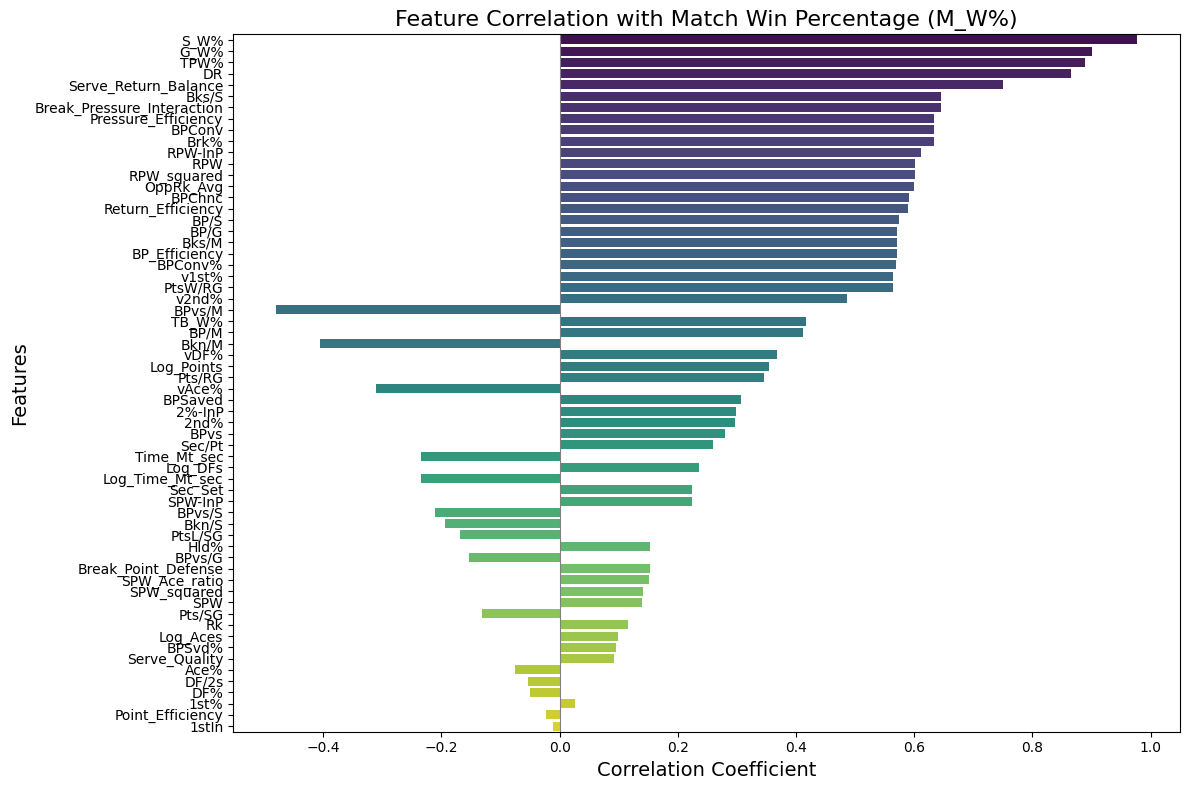

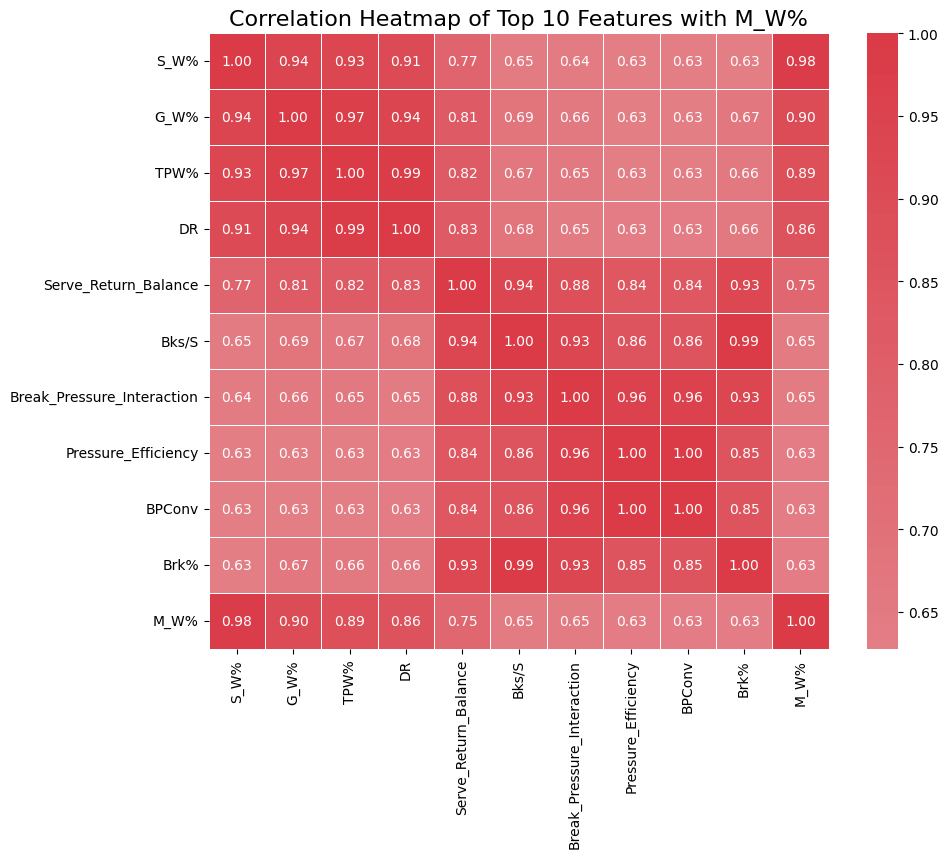

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_numerical = df_combined.select_dtypes(include=[np.number])

corr_matrix = df_numerical.corr()

target_correlations = corr_matrix['M_W%'].drop('M_W%')  # Exclude self-correlation

# Sort the correlations by absolute value in descending order
sorted_correlations = target_correlations.abs().sort_values(ascending=False)
sorted_correlations = target_correlations.loc[sorted_correlations.index]

# Plotting the correlation with 'M_W%'
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette='viridis')
plt.axvline(x=0, color='grey', linewidth=0.8)
plt.title('Feature Correlation with Match Win Percentage (M_W%)', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.show()

# Heatmap of Top N Correlated Features
top_n = 10
top_features = sorted_correlations.abs().sort_values(ascending=False).head(top_n).index.tolist()
top_features_with_target = top_features + ['M_W%']

top_corr_matrix = df_numerical[top_features_with_target].corr()

plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(top_corr_matrix, annot=True, cmap=cmap, center=0, linewidths=.5, fmt=".2f")
plt.title(f'Correlation Heatmap of Top {top_n} Features with M_W%', fontsize=16)
plt.show()


Explanation: Im going to delete those high corr value like S_W% because they give an obvious information, more set win % == more match win %

In [8]:
df_combined.drop(['S_W%', 'G_W%', 'TPW%','DR'], axis=1, inplace=True)

C:\Users\Marco Aloisi\AppData\Local\Temp\ipykernel_10720\991616682.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette='viridis')


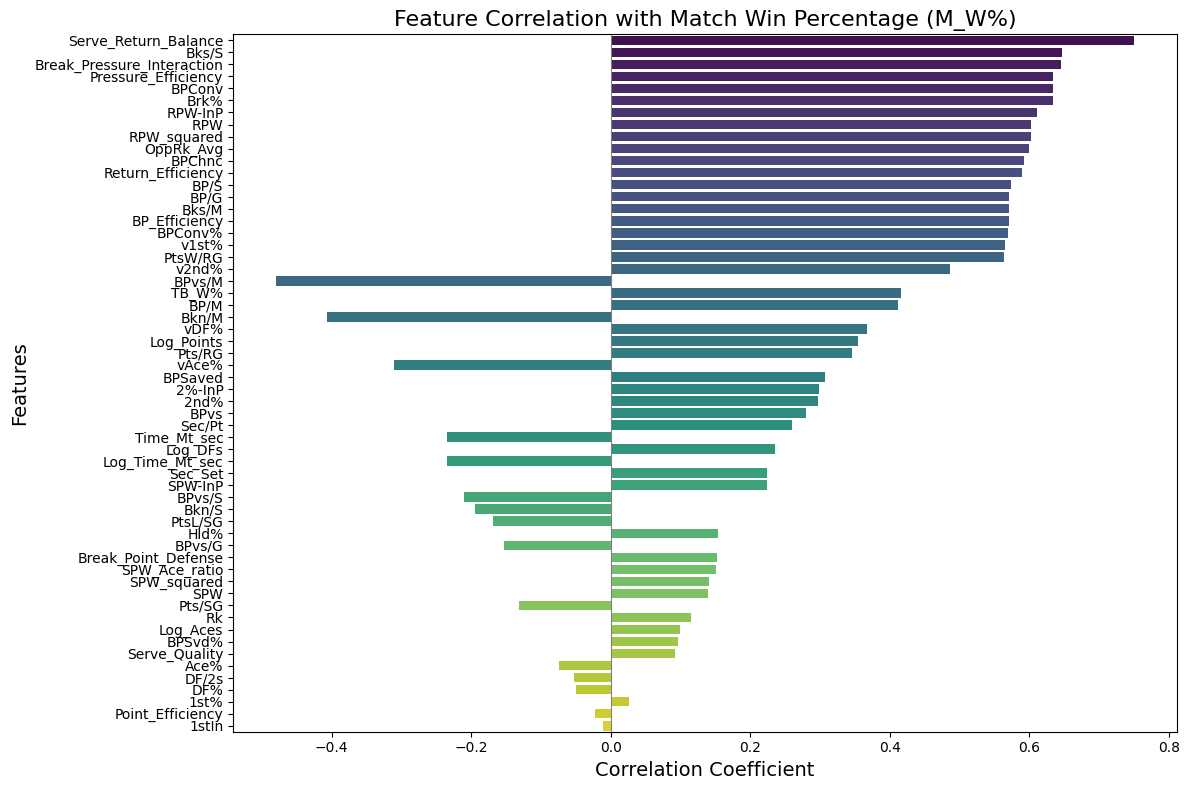

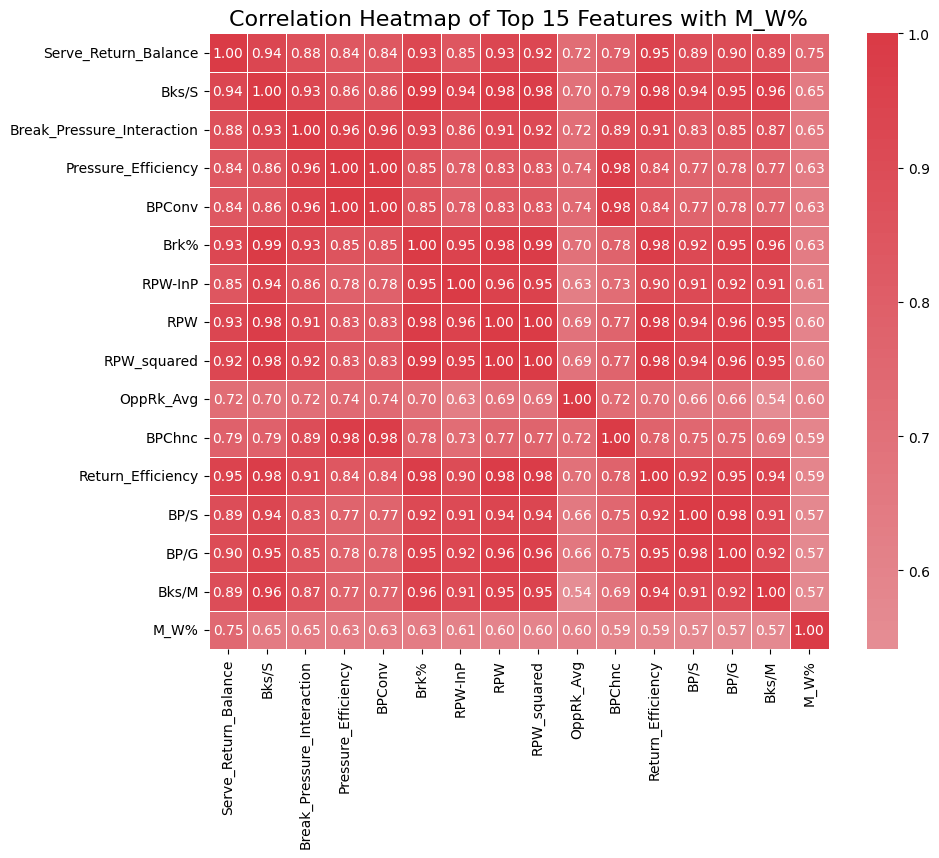

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Select only numerical columns from the DataFrame
df_numerical = df_combined.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = df_numerical.corr()

# Extract correlations with 'M_W%'
target_correlations = corr_matrix['M_W%'].drop('M_W%')  # Exclude self-correlation

# Sort the correlations by absolute value in descending order
sorted_correlations = target_correlations.abs().sort_values(ascending=False)
sorted_correlations = target_correlations.loc[sorted_correlations.index]

# Plotting the correlation with 'M_W%'
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette='viridis')
plt.axvline(x=0, color='grey', linewidth=0.8)
plt.title('Feature Correlation with Match Win Percentage (M_W%)', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.show()

# Heatmap of Top N Correlated Features
top_n = 15
top_features = sorted_correlations.abs().sort_values(ascending=False).head(top_n).index.tolist()
top_features_with_target = top_features + ['M_W%']

top_corr_matrix = df_numerical[top_features_with_target].corr()

plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(top_corr_matrix, annot=True, cmap=cmap, center=0, linewidths=.5, fmt=".2f")
plt.title(f'Correlation Heatmap of Top {top_n} Features with M_W%', fontsize=16)
plt.show()


Explanation: Now the variables are not corr highly like before, we can now test and train the model to see if we need further processing

In [10]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Rk                          103 non-null    int64   
 1   M_W%                        103 non-null    float64 
 2   SPW                         103 non-null    float64 
 3   SPW-InP                     103 non-null    float64 
 4   Ace%                        103 non-null    float64 
 5   DF%                         103 non-null    float64 
 6   DF/2s                       103 non-null    float64 
 7   1stIn                       103 non-null    float64 
 8   1st%                        103 non-null    float64 
 9   2nd%                        103 non-null    float64 
 10  2%-InP                      103 non-null    float64 
 11  Hld%                        103 non-null    float64 
 12  Pts/SG                      103 non-null    float64 
 13  PtsL/SG             

## TRAINING

In [11]:
# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold

# Regression Models
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

import pandas as pd
import numpy as np

In [12]:
X = df_combined.drop(['M_W%'], axis=1)  # Drop the target 'M_W%' 
y = df_combined['M_W%']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Standardize numerical data
        ('cat', OneHotEncoder(), categorical_features)  # One-hot encode categorical data
    ])

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Bayesian Ridge': BayesianRidge(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Extreme Gradient Boosting': xgb.XGBRegressor(random_state=42)
}

# Define the function to evaluate each model
def evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    # Create a new pipeline for each model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Perform cross-validation
    cross_val = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2').mean()
    
    # Print results
    print(f"Model: {model_name}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R²): {r2:.4f}")
    print(f"Cross-Validation R²: {cross_val:.4f}")
    print("-" * 40)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate each model
for model_name, model in models.items():
    evaluate_model(model_name, model, X_train, y_train, X_test, y_test)


Model: Linear Regression
Mean Absolute Error (MAE): 0.0566
Mean Squared Error (MSE): 0.0047
Root Mean Squared Error (RMSE): 0.0685
R-squared (R²): 0.3798
Cross-Validation R²: -4.8350
----------------------------------------
Model: Bayesian Ridge
Mean Absolute Error (MAE): 0.0340
Mean Squared Error (MSE): 0.0015
Root Mean Squared Error (RMSE): 0.0393
R-squared (R²): 0.7961
Cross-Validation R²: 0.8121
----------------------------------------
Model: Random Forest
Mean Absolute Error (MAE): 0.0391
Mean Squared Error (MSE): 0.0027
Root Mean Squared Error (RMSE): 0.0520
R-squared (R²): 0.6436
Cross-Validation R²: 0.6202
----------------------------------------
Model: Decision Tree
Mean Absolute Error (MAE): 0.0668
Mean Squared Error (MSE): 0.0064
Root Mean Squared Error (RMSE): 0.0802
R-squared (R²): 0.1502
Cross-Validation R²: 0.3405
----------------------------------------
Model: Gradient Boosting
Mean Absolute Error (MAE): 0.0479
Mean Squared Error (MSE): 0.0033
Root Mean Squared Error (R

We will be using Bayesian Ridge to predict our win %

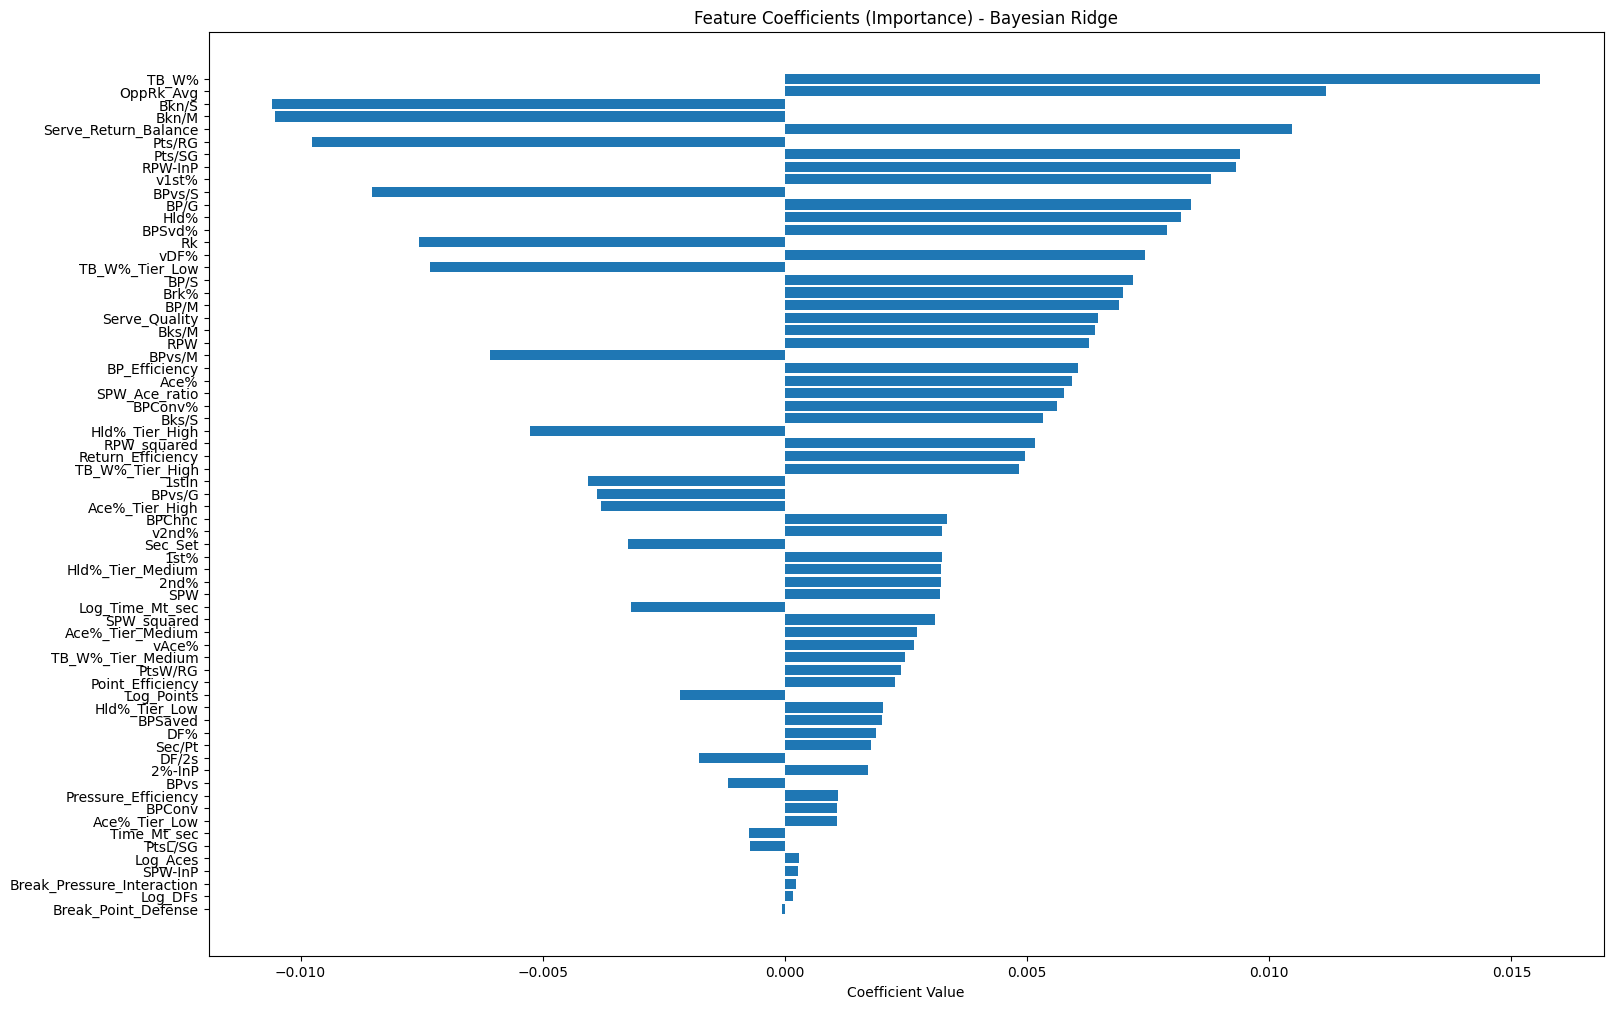

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Get the transformed feature names after preprocessing
def get_feature_names_from_preprocessor(preprocessor, X):
    # Handle numerical and categorical feature names
    num_features = preprocessor.transformers_[0][2]
    cat_features = preprocessor.transformers_[1][1].get_feature_names_out(preprocessor.transformers_[1][2])
    return np.concatenate([num_features, cat_features])

# Function to plot coefficients (feature importance for linear models)
def plot_coefficients(model, model_name, preprocessor, X_train):
    if hasattr(model, 'coef_'):
        # Fit the preprocessor to get the correct feature names
        X_transformed = preprocessor.fit_transform(X_train)
        feature_names = get_feature_names_from_preprocessor(preprocessor, X_train)

        # Get the coefficients from the model
        coefficients = model.coef_
        indices = np.argsort(np.abs(coefficients))[::-1]  # Sort by absolute value of coefficients
        
        plt.figure(figsize=(18, 12))
        plt.title(f"Feature Coefficients (Importance) - {model_name}")
        plt.barh(range(len(coefficients)), coefficients[indices], align="center")
        plt.yticks(range(len(coefficients)), feature_names[indices])
        plt.xlabel("Coefficient Value")
        plt.gca().invert_yaxis()  # Invert to have most important on top
        plt.show()

# Example: Checking feature importance for Bayesian Ridge
model = BayesianRidge()

# Fit the pipeline (preprocessor and model)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
pipeline.fit(X_train, y_train)

# Plot coefficients (feature importance)
plot_coefficients(model, 'Bayesian Ridge', preprocessor, X_train)


In [14]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

model = BayesianRidge()

# Create the pipeline with preprocessor and model
pipeline_full = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Fit the pipeline on the full training set
pipeline_full.fit(X_train, y_train)

# Extract the preprocessed features after the pipeline
X_train_preprocessed = pipeline_full.named_steps['preprocessor'].transform(X_train)

# Now that the model is fitted, we can access the coefficients
importances = np.abs(model.coef_)  # Get the absolute values of the coefficients

# Check if importances match the preprocessed feature shape
if len(importances) != X_train_preprocessed.shape[1]:
    raise ValueError("The number of features after preprocessing doesn't match the number of model coefficients.")

# Rank features by importance
indices = np.argsort(importances)[::-1]

results = []

# Loop through different numbers of top N features
for N in range(1, len(indices) + 1):
    # Select the top N features
    top_n_features_indices = indices[:N]
    
    # Subset the preprocessed training data with the top N features
    X_train_top_n = X_train_preprocessed[:, top_n_features_indices]
    X_test_preprocessed = pipeline_full.named_steps['preprocessor'].transform(X_test)
    X_test_top_n = X_test_preprocessed[:, top_n_features_indices]

    # Train the model with the top N features
    model_top_n = BayesianRidge()
    model_top_n.fit(X_train_top_n, y_train)

    # Predict on the test set
    y_pred = model_top_n.predict(X_test_top_n)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store the results for this number of features
    results.append((N, r2, mae, mse, rmse))

    print(f"Number of Features: {N}")
    print(f"R-squared (R²): {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print("-" * 40)

# After the loop, find the best R² score and the corresponding number of features
best_result = max(results, key=lambda x: x[1])
print(f"Best Number of Features: {best_result[0]}")
print(f"Best R-squared (R²): {best_result[1]:.4f}")


Number of Features: 1
R-squared (R²): 0.0786
Mean Absolute Error (MAE): 0.0613
Mean Squared Error (MSE): 0.0070
Root Mean Squared Error (RMSE): 0.0835
----------------------------------------
Number of Features: 2
R-squared (R²): 0.2660
Mean Absolute Error (MAE): 0.0575
Mean Squared Error (MSE): 0.0056
Root Mean Squared Error (RMSE): 0.0746
----------------------------------------
Number of Features: 3
R-squared (R²): 0.3619
Mean Absolute Error (MAE): 0.0525
Mean Squared Error (MSE): 0.0048
Root Mean Squared Error (RMSE): 0.0695
----------------------------------------
Number of Features: 4
R-squared (R²): 0.3866
Mean Absolute Error (MAE): 0.0514
Mean Squared Error (MSE): 0.0046
Root Mean Squared Error (RMSE): 0.0682
----------------------------------------
Number of Features: 5
R-squared (R²): 0.6437
Mean Absolute Error (MAE): 0.0422
Mean Squared Error (MSE): 0.0027
Root Mean Squared Error (RMSE): 0.0520
----------------------------------------
Number of Features: 6
R-squared (R²): 0.

In [28]:
# Get the transformed feature names
try:
    transformed_feature_names = pipeline_full.named_steps['preprocessor'].get_feature_names_out()
except AttributeError:
    raise ValueError("The preprocessor does not support `get_feature_names_out`. Make sure it's a ColumnTransformer.")

# Select the top 28 feature indices based on importance
top_28_indices = indices[:28]  # Select the first 28 indices based on importance

# Print the feature names for the top 28 important features
print("Top 28 important features after preprocessing:")
for idx in top_28_indices:
    if idx < len(transformed_feature_names):
        print(f"Index: {idx}, Feature Name: {transformed_feature_names[idx]}")
    else:
        print(f"Index: {idx} is out of bounds for transformed feature names.")


Top 28 important features after preprocessing:
Index: 38, Feature Name: num__TB_W%
Index: 52, Feature Name: num__OppRk_Avg
Index: 36, Feature Name: num__Bkn/S
Index: 37, Feature Name: num__Bkn/M
Index: 57, Feature Name: num__Serve_Return_Balance
Index: 20, Feature Name: num__Pts/RG
Index: 11, Feature Name: num__Pts/SG
Index: 14, Feature Name: num__RPW-InP
Index: 17, Feature Name: num__v1st%
Index: 34, Feature Name: num__BPvs/S
Index: 25, Feature Name: num__BP/G
Index: 10, Feature Name: num__Hld%
Index: 30, Feature Name: num__BPSvd%
Index: 0, Feature Name: num__Rk
Index: 16, Feature Name: num__vDF%
Index: 62, Feature Name: cat__TB_W%_Tier_Low
Index: 26, Feature Name: num__BP/S
Index: 19, Feature Name: num__Brk%
Index: 27, Feature Name: num__BP/M
Index: 47, Feature Name: num__Serve_Quality
Index: 29, Feature Name: num__Bks/M
Index: 13, Feature Name: num__RPW
Index: 35, Feature Name: num__BPvs/M
Index: 46, Feature Name: num__BP_Efficiency
Index: 3, Feature Name: num__Ace%
Index: 42, Featu

In [25]:
print(indices)

[38 52 36 37 57 20 11 14 17 34 25 10 30  0 16 62 26 19 27 47 29 13 35 46
  3 42 22 28 64 56 48 61  6 33 58 24 18 40  7 66  8  1 51 55 60 15 63 21
 53 45 65 31  4 39  5  9 32 49 23 59 41 12 43  2 50 44 54]


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

top_15_features_indices = indices[:28]

# Subset the preprocessed training and test data with the top 15 features
X_train_preprocessed = pipeline_full.named_steps['preprocessor'].transform(X_train)
X_test_preprocessed = pipeline_full.named_steps['preprocessor'].transform(X_test)

X_train_top_15 = X_train_preprocessed[:, top_15_features_indices]
X_test_top_15 = X_test_preprocessed[:, top_15_features_indices]

# Define the parameter grid for Bayesian Ridge
param_grid = {
    'alpha_1': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2],
    'alpha_2': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2],
    'lambda_1': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2],
    'lambda_2': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2],
    'tol': [1e-5, 1e-4, 1e-3, 1e-2],
}

bayesian_ridge = BayesianRidge()

grid_search = GridSearchCV(bayesian_ridge, param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train_top_15, y_train)

# Get the best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation R²: {best_score:.4f}")

y_pred_best = grid_search.predict(X_test_top_15)

# Calculate evaluation metrics
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Tuned Model - Mean Absolute Error (MAE): {mae_best:.4f}")
print(f"Tuned Model - Mean Squared Error (MSE): {mse_best:.4f}")
print(f"Tuned Model - Root Mean Squared Error (RMSE): {rmse_best:.4f}")
print(f"Tuned Model - R-squared (R²): {r2_best:.4f}")


from sklearn.model_selection import cross_val_score

nested_scores = cross_val_score(grid_search, X_train_top_15, y_train, cv=5, scoring='r2')
print(f"Nested CV R² scores: {nested_scores}")
print(f"Mean Nested CV R²: {nested_scores.mean():.4f}")


Best Hyperparameters: {'alpha_1': 1e-08, 'alpha_2': 0.01, 'lambda_1': 0.01, 'lambda_2': 1e-08, 'tol': 1e-05}
Best Cross-Validation R²: 0.8492
Tuned Model - Mean Absolute Error (MAE): 0.0303
Tuned Model - Mean Squared Error (MSE): 0.0013
Tuned Model - Root Mean Squared Error (RMSE): 0.0360
Tuned Model - R-squared (R²): 0.8292
Nested CV R² scores: [0.83283857 0.92255524 0.83835774 0.81255162 0.83976718]
Mean Nested CV R²: 0.8492


## PREDICT

LOAD PREDICT DF AND CLEAN IT

In [16]:
df_predict = pd.read_csv("df_combined_predict.csv")

In [17]:
np_actual_values = df_predict["M_W%"].to_numpy()
np_actual_values

array([0.918, 0.803, 0.744, 0.81 , 0.718, 0.708, 0.639, 0.694, 0.731,
       0.73 , 0.657, 0.712, 0.691, 0.638, 0.569, 0.631, 0.567, 0.61 ,
       0.597, 0.571, 0.545, 0.596, 0.59 , 0.603, 0.54 , 0.533, 0.6  ,
       0.604, 0.561, 0.524, 0.556, 0.5  , 0.522, 0.455, 0.547, 0.533,
       0.545, 0.565, 0.459, 0.6  , 0.737, 0.5  , 0.482, 0.462, 0.542,
       0.481, 0.625, 0.481, 0.44 , 0.476])

In [18]:
df_predict = apply_feature_engineering(df_predict)

df_predict.drop('M_W%', axis=1, inplace=True)

Make the top 50 predictons

In [19]:
df_predict_pre = pipeline_full.named_steps['preprocessor'].transform(df_predict)

predict_df_top_16 = df_predict_pre[:, top_15_features_indices]

y_pred_new = grid_search.predict(predict_df_top_16)

print("Predicted values for new data (predict_df):", y_pred_new)

Predicted values for new data (predict_df): [0.81523104 0.77895455 0.68444017 0.74935158 0.65596808 0.67340967
 0.6091468  0.66205481 0.66281092 0.70971074 0.6452784  0.68527783
 0.61265724 0.5727283  0.55033431 0.63373287 0.5082414  0.62787963
 0.61252345 0.53687185 0.54968652 0.55661728 0.53661343 0.58692752
 0.54534257 0.51108554 0.58723264 0.56670822 0.54100836 0.52025453
 0.48774595 0.4660302  0.47169627 0.41711411 0.50056954 0.54354653
 0.50023402 0.56144648 0.42477668 0.57432419 0.68452382 0.52603817
 0.52812429 0.46743537 0.53799281 0.4911747  0.54551797 0.4953305
 0.45024418 0.43209283]


See how the predictions perfomed

In [20]:
predict_mse = mean_squared_error(np_actual_values, y_pred_new)
predict_mae = mean_absolute_error(np_actual_values, y_pred_new)
predict_r2 = r2_score(np_actual_values, y_pred_new)

print(f"MSE value: {predict_mse}\nMAE value: {predict_mae}\nR2 accuracy: {predict_r2}")


MSE value: 0.0016896004116381787
MAE value: 0.033721574747936744
R2 accuracy: 0.8407949970331701


PREDICT WITH TUNED MODEL BY ME

MSE value: 0.0016896004116381787
MAE value: 0.033721574747936744
R2 accuracy: 0.8407949970331701


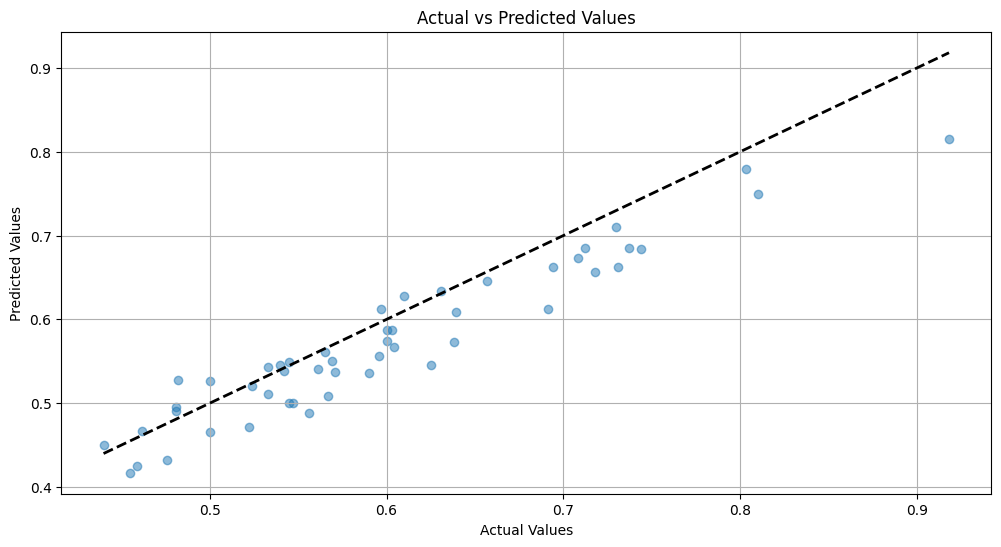

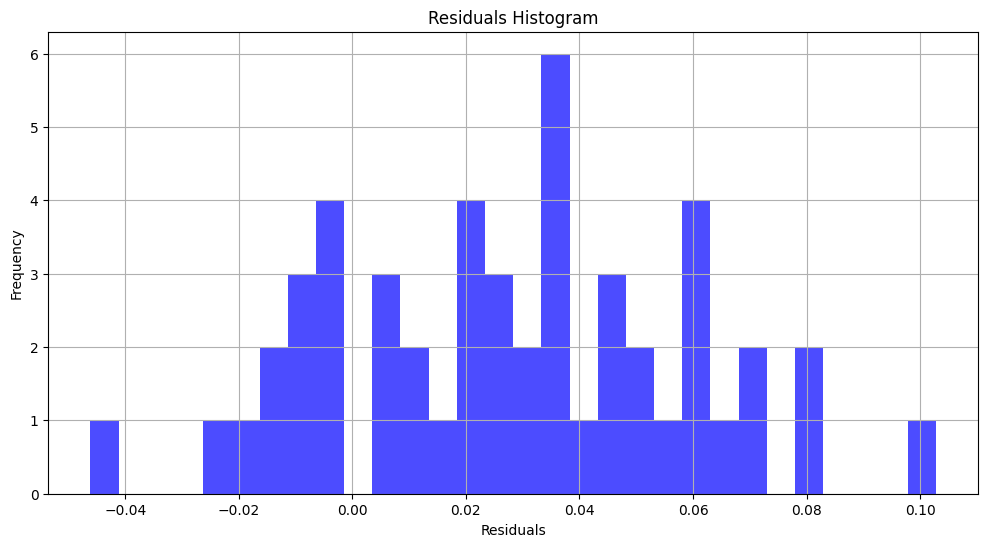

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate prediction metrics
predict_mse = mean_squared_error(np_actual_values, y_pred_new)
predict_mae = mean_absolute_error(np_actual_values, y_pred_new)
predict_r2 = r2_score(np_actual_values, y_pred_new)

# Print the results
print(f"MSE value: {predict_mse}\nMAE value: {predict_mae}\nR2 accuracy: {predict_r2}")

# Plotting Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.scatter(np_actual_values, y_pred_new, alpha=0.5)
plt.plot([np_actual_values.min(), np_actual_values.max()], [np_actual_values.min(), np_actual_values.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid()
plt.show()

# Calculate residuals
residuals = np_actual_values - y_pred_new

# Plot Residuals Histogram
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.7)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()


SAVE MODEL

In [22]:
import pickle

In [24]:
# save
with open('model.pkl','wb') as f:
    pickle.dump(grid_search,f)

# Save pipeline
with open('pipeline_full.pkl', 'wb') as f:
    pickle.dump(pipeline_full, f)

# Save feature indices
with open('top_28_features_indices.pkl', 'wb') as f:
    pickle.dump(top_15_features_indices, f)